<a href="https://www.kaggle.com/code/brianlaurenszzz/revenue-ice-cream-simple-linear-regression?scriptVersionId=102052620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ice-cream-revenue/IceCreamData.csv


In [2]:
df = pd.read_csv('/kaggle/input/ice-cream-revenue/IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
X = df['Temperature']
X = sm.add_constant(X)
y = df['Revenue']

# fit and make the predictions by the model
slr = sm.OLS(y, X).fit()
prediction = slr.predict(X)

# print out the statistic
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.404e+04
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:41:23   Log-Likelihood:                -2318.1
No. Observations:                 500   AIC:                             4640.
Df Residuals:                     498   BIC:                             4649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8313      3.272     13.703      0.000      38.403      51.259
Temperature    21.4436      0.138    155.057      0.000      21.172      21.715
==============================================================================
Omnibus:                        3.595   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                4.192
Skew:                           0.032   Prob(JB):                        0.123
Kurtosis:                       3.444   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

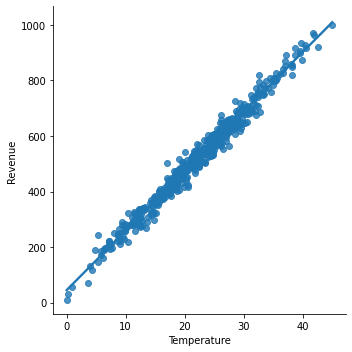

In [5]:
sns.lmplot(x='Temperature', y='Revenue', data=df);

In [6]:
X_slr = df[['Temperature']]
y_slr = df[['Revenue']]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_slr, y_slr, test_size=0.2, random_state=17)

In [9]:
print(y_train.shape)
print(y_test.shape)

(400, 1)
(100, 1)


In [10]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# fit and make the predictions by the model
slr = sm.OLS(y_train, X_train2).fit() # ordinaly least squares
predictions = slr.predict (X_test2)

slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.852e+04
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:41:23   Log-Likelihood:                -1857.7
No. Observations:                 400   AIC:                             3719.
Df Residuals:                     398   BIC:                             3727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          47.3575      3.700     12.800      0.000      40.084      54.631
Temperature    21.3427      0.157    136.075      0.000      21.034      21.651
==============================================================================
Omnibus:                        4.117   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                5.015
Skew:                           0.049   Prob(JB):                       0.0815
Kurtosis:                       3.540   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print('intercept : ', model_lr.intercept_[0])
print('slope : ', model_lr.coef_[0][0])

intercept :  47.35746739134203
slope :  21.34268352959344


In [13]:
def price_pred(rm):
  return model_lr.coef_[0][0] * rm + model_lr.intercept_[0]

In [14]:
X_test.head(1)

,Temperature
190,12.900666


In [15]:
y_test.head(1)

,Revenue
190,339.109583


In [16]:
price_pred(12.900666)

322.6922991503281

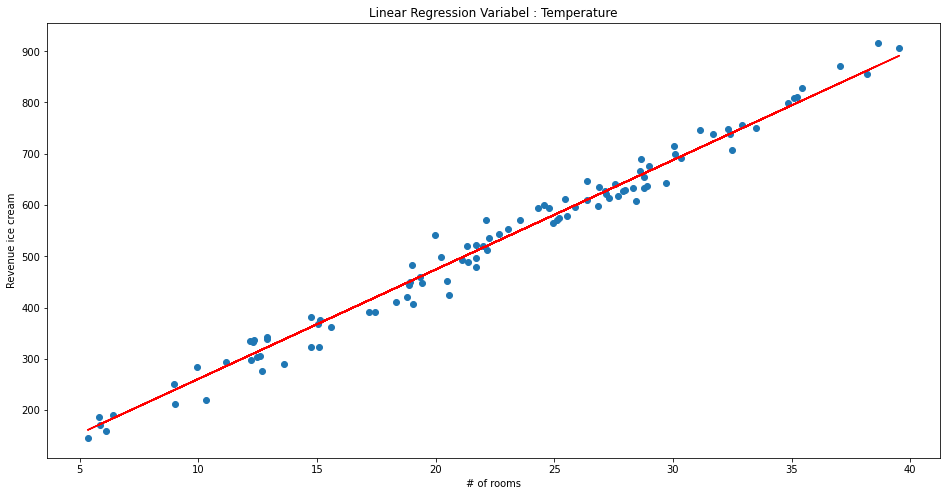

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

y_pred_slr = model_lr.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_slr, c='r')
plt.xlabel('# of rooms')
plt.ylabel('Revenue ice cream')
plt.title('Linear Regression Variabel : Temperature');

In [18]:
print('MSE :', metrics.mean_squared_error(y_test, y_pred_slr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr)))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_slr))
print('R^2 :', model_lr.score(X_test,y_test))

MSE : 587.3618869758722
RMSE : 24.235550065469365
MAE : 19.66144198854761
R^2 : 0.9823018781419407


In [19]:
compare = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_slr, columns=['Prediction']))
compare.head()

,Revenue,Prediction
0,339.109583,322.692296
1,145.625302,161.293520
2,646.266946,609.961717
3,543.985058,531.378799
4,675.828916,666.161622


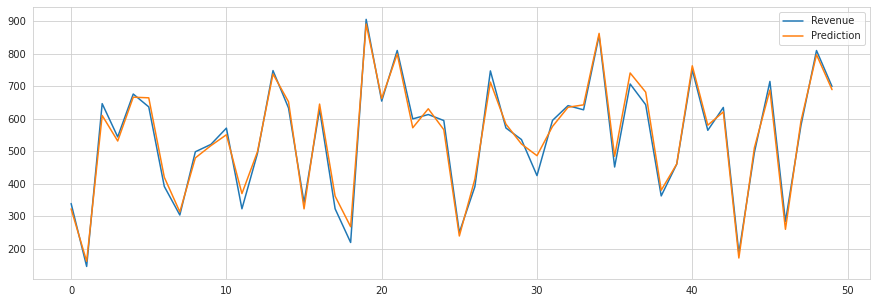

In [20]:
sns.set_style('whitegrid')
compare.head(50).plot(kind='line', figsize=(15,5));

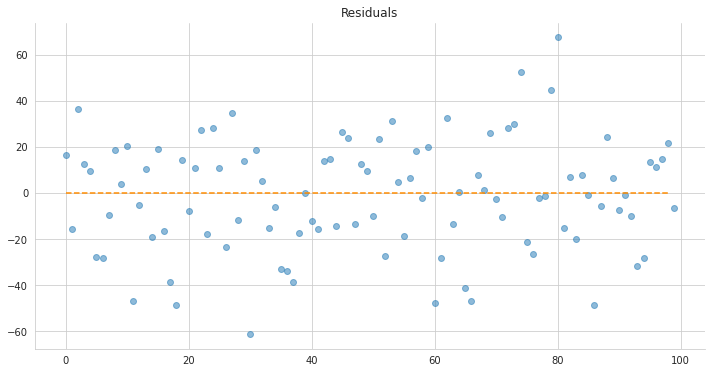

In [21]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)
plt.scatter(x=compare.index, y=compare['Revenue']-compare['Prediction'], alpha=0.5)
plt.plot(np.repeat(0, compare.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Residuals')
plt.show()